In [57]:
#Importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import csv

In [58]:
#Reading and printing first 5 entries of the dataset
dataset = pd.read_csv("Unemp.csv")
print(dataset.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [59]:
# Checking if there are any Null values/ missing values in the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [60]:
# Renaming the columns for convenience
dataset.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [61]:
with open("Unemp.csv",'r') as f:
    reader = csv.reader(f)
    hsh = {}
    for row in reader:
        if row[3] == ' Estimated Unemployment Rate (%)':
            continue
        if row[0] not in hsh:
            hsh[row[0]] = [float(row[3])]
        else:
            hsh[row[0]].append(float(row[3]))
    for i in hsh:
        hsh[i] = sum(hsh[i])/len(hsh[i])

states = ["Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Ladakh","Delhi","Puducherry"]


with open("Unemp2.csv", "w") as f2:
    writer = csv.writer(f2)
    writer.writerow(['State','Unemployment Rate'])
    for i in hsh:
        writer.writerow([i,hsh[i]])
        if i in states:
            states.remove(i)

    for i in states:
        writer.writerow([i,0])

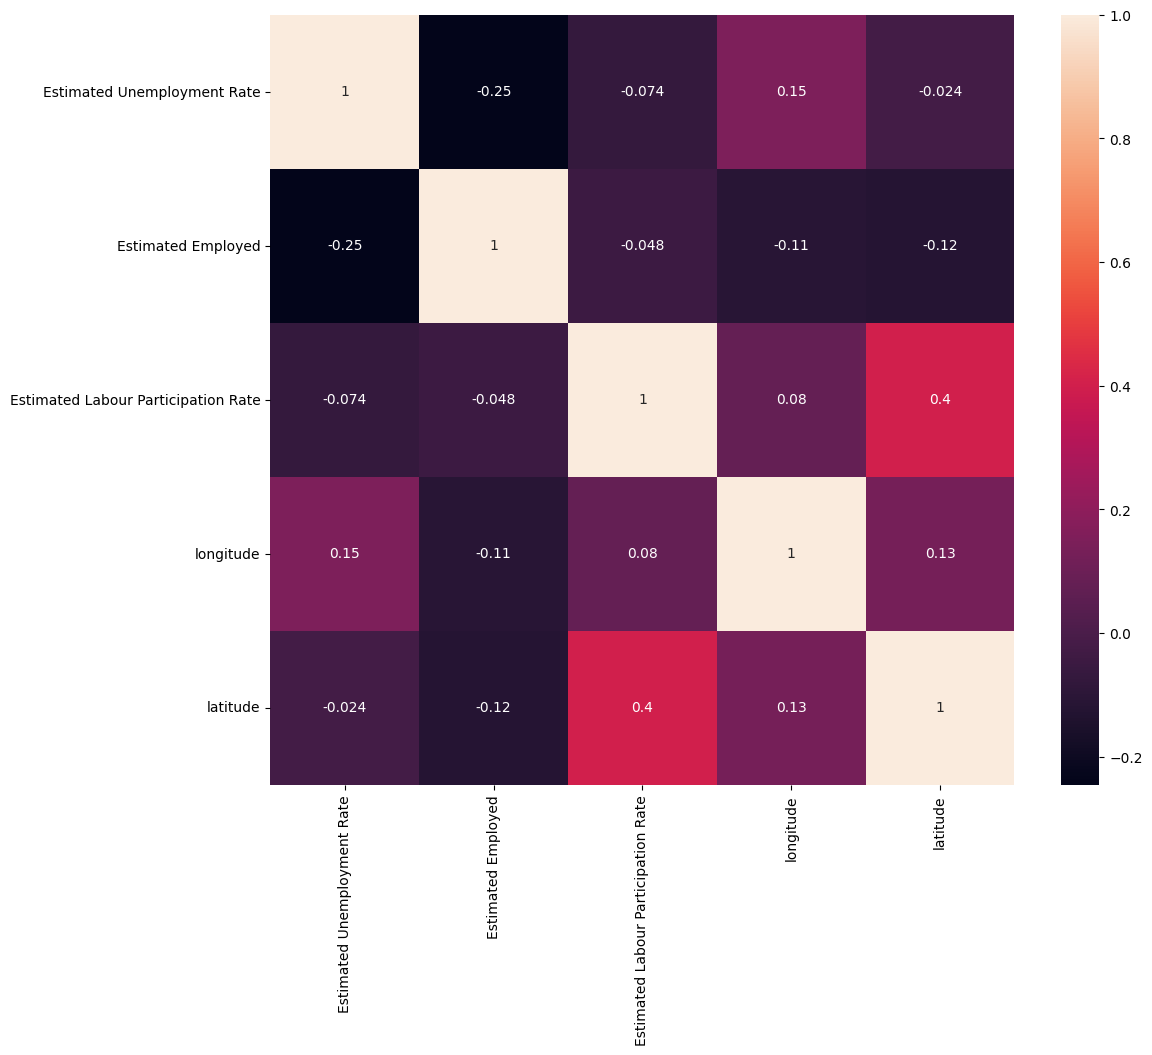

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.drop(["States", "Date", "Frequency" , "Region"], axis = 1).corr(), annot = True)
plt.show()

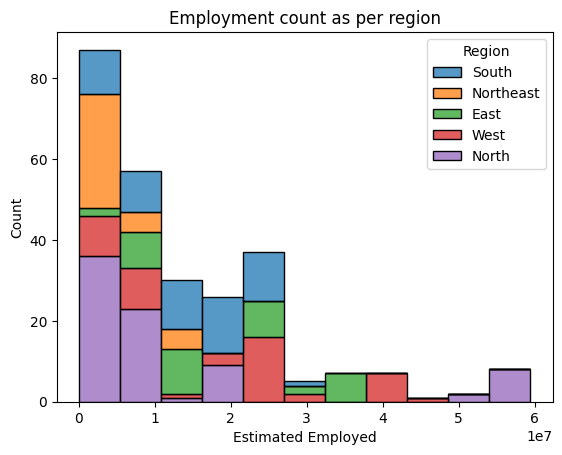

In [63]:
plt.title("Employment count as per region")
sns.histplot(x = "Estimated Employed", hue = "Region", data=dataset, multiple="stack")
plt.show()

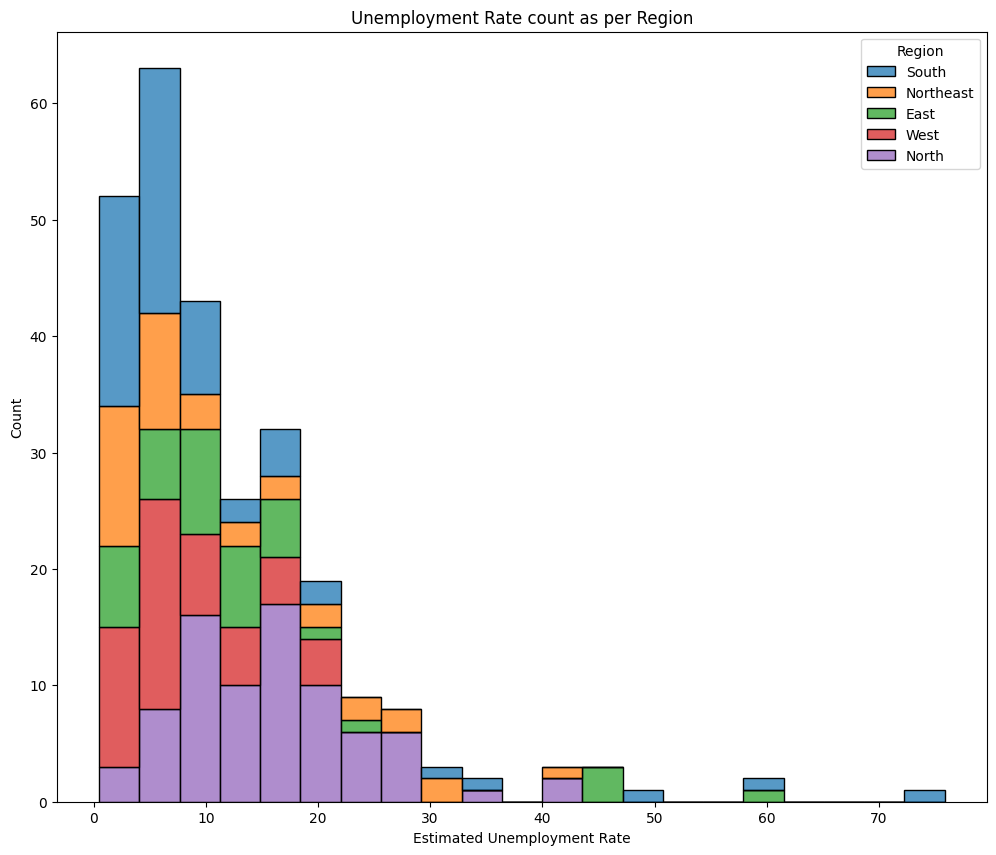

In [64]:
plt.figure(figsize=(12, 10))
plt.title("Unemployment Rate count as per Region")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=dataset, multiple="stack")
plt.show()

In [66]:

df = pd.read_csv("Unemp2.csv")

fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Unemployment Rate',
    color_continuous_scale='Greys'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()